Question4 - Increase Vibrance of a Photograph

In [1]:
# Q4 — Vibrance enhancement on S channel (HSV) with Gaussian-bump transform
from pathlib import Path
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
input_image_path = Path("../data/a1images/spider.png")   # Fig.4 image
output_folder    = Path("../data/output_images")
os.makedirs(output_folder, exist_ok=True)

out_img          = output_folder / "q4_vibrance_enhanced.png"
out_curve        = output_folder / "q4_intensity_transform.png"

In [3]:
img_bgr = cv.imread(str(input_image_path), cv.IMREAD_COLOR)
if img_bgr is None:
    raise FileNotFoundError(f"Could not find {input_image_path}")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

In [4]:
# ---------- transform definition (as in the question) ----------
def vibrance_lut(a=0.60, sigma=70.0):
    """
    Build a 256-entry LUT for:
        f(x) = min(x + a*128*exp(-(x-128)^2 / (2*sigma^2)), 255)
    where x in [0,255], a∈[0,1], sigma=70
    """
    x = np.arange(256, dtype=np.float32)
    bump = a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * (sigma ** 2)))
    y = np.minimum(x + bump, 255.0)
    return y.astype(np.uint8), x, y

In [5]:
# ---------- apply to S channel only ----------
a_value = 0.60      # <-- MY chosen value after visual check; report this in the write-up
lut, x, y = vibrance_lut(a=a_value, sigma=70.0)

img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)
H, S, V = cv.split(img_hsv)      # S in [0,255]
S2 = cv.LUT(S, lut)              # transformed saturation

img_vibrant_rgb = cv.cvtColor(cv.merge([H, S2, V]), cv.COLOR_HSV2RGB)

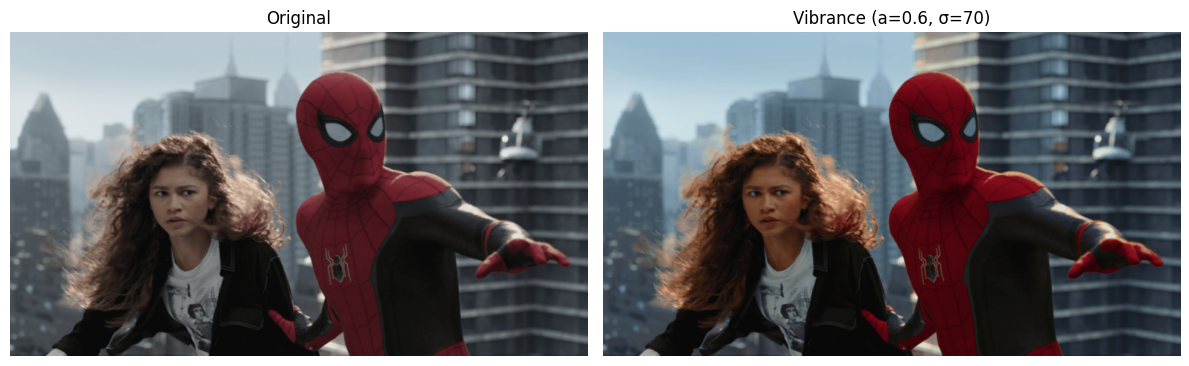

True

In [6]:
# ---------- show/save images ----------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_rgb);          plt.title("Original");                       plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_vibrant_rgb);  plt.title(f"Vibrance (a={a_value}, σ=70)");  plt.axis("off")
plt.tight_layout(); plt.show()

cv.imwrite(str(out_img), cv.cvtColor(img_vibrant_rgb, cv.COLOR_RGB2BGR))

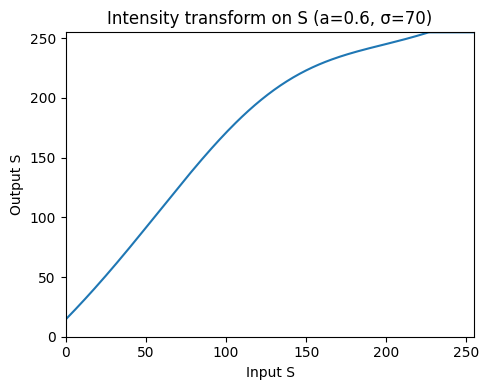

In [7]:
# ---------- plot/save the intensity transform curve ----------
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.title(f"Intensity transform on S (a={a_value}, σ=70)")
plt.xlabel("Input S"); plt.ylabel("Output S")
plt.xlim(0,255); plt.ylim(0,255)
plt.tight_layout(); plt.savefig(str(out_curve), dpi=150); plt.show()